# *M505D - Machine learning analysis for diabetes prediction*

# Business Problem
Diabetes is a long-term illness that impacts millions of people across the globe and is an increasing burden to health care services (Hossain et al., 2023). With early diagnosis, it is possible to eliminate dangerous complications, save money on healthcare costs, and increase the quality of life of patients. Timely identification however is a challenge because of limited resources and delayed clinical testing. This project aims to create a machine learning model which will be used to predict the possibility of a patient having diabetes given certain common medical signs. Automating this process can allow healthcare professionals to identify high-risk persons in advance, prioritize care, and allocate resources more efficiently. This can be a valuable tool in the modern preventive healthcare as a reliable prediction system allows more proactive and data-driven medical interventions (Rahman et al., 2024). To further assist health care workers, this predictive system may be inserted into electronic health record systems to conduct real time risk assessment during routine checkups. This enables non-specialist practitioners to make quality referrals and lessen the load on endocrinologists and enhances patient flow within the healthcare system. In addition, the model could serve to help in community outreach programs through the identification of high-risk groups due to demographic and health indicators to receive specific education and preventive care. The model can also be retrained over time to accommodate changes in the population and developments in medicine to maintain its accuracy and relevance in a variety of clinical contexts.

In [ ]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Warnings
import warnings
warnings.filterwarnings('ignore')


# Dataset Description
The dataset associated with this project is the Pima Indians Diabetes Database, which was first published by the National Institute of Diabetes and Digestive and Kidney Diseases. It has 768 female patients records of age 21 or above of Pima Indian descent. The records contain 8 medical attributes, including glucose level, blood pressure, BMI, insulin, and number of pregnancies plus binary outcome variable that represents whether or not the patient has diabetes (0 or 1). This data is popular in healthcare analytics to create and assess classification models associated with the prediction of diabetes.

Besides a small size and a balanced structure, Pima Indians Diabetes Database provides a convenient base to use machine learning algorithms to identify health issues in medical diagnostics. Although there is a middle range of imbalance in the classes of about 65% non-diabetic, and 35% diabetic cases, in any case, the data set is applicable in the classification tasks with proper handling methodologies such as stratified splitting or resampling. There are variables such as the insulin, the skin thickness, or the BMI, which happen to have 0.0 values in some of the features, and must be imputed so that it can be properly analyzed. The simplicity of the dataset, along with its medical application in a real-world scenario, ensures it remains a perfect benchmark in testing various models, understanding the importance of features, and emulating a decision support system in a real clinical setting.


In [ ]:
# Load dataset
df = pd.read_csv("diabetes.csv")

# Preview the first few rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The dataset consists of 768 records and 9 variables, where 8 of the numerical input variables are numeric and one, the outcome, is a binary variable, where 1 represents diabetes presence and 0 represents the absence. All are numeric features, including medical and demographic variables like glucose, insulin, blood pressure, BMI, age, and pregnancies.

Preliminary analysis indicates that there are no NaN values, but many of the features are critical (e.g., Glucose, BloodPressure, BMI, Insulin, SkinThickness) with zero values, which are not medically valid and were considered missing. These were imputed afterwards with the median.

The data has class imbalance; one side (non-diabetic patients) is approximately 65% and the other (diabetic patients) is approximately 35%. Summary statistics shows that features such as Insulin and SkinThickness have outliers and skewed distributions. The medical measurements in this dataset lead to quality concerns and necessitate preprocessing prior to modeling because it is classifiable in binary.


In order to improve the quality of data further, the scaling is used to equalize the feature values, meaning that each variable plays an equal role when training a model (Ozsahin et al., 2022). Histograms, box plots and pair plots were also used to visually explore skewness and possible relationships between variables, especially between glucose and outcome. The existence of outliers in the characteristics (such as insulin and BMI) indicated that strong models that were not sensitive to the aberrant values would be required. Stratified train-test splitting maintained class balance, a key to balanced model assessment. Generally, the data set includes valuable information about the correlation between the physiological variables and the risk of diabetes, which is useful in predictive modeling in medical practice.

In [ ]:
# Dataset dimensions (rows, columns)
print("Shape of the dataset:", df.shape)

# Data types and missing/null values
print("\nData Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for zeros in critical columns (which may indicate missing values)
columns_with_missing_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\nCount of zeros in potentially invalid columns:")
print((df[columns_with_missing_values] == 0).sum())

# Distribution of the target variable
print("\nClass distribution:")
print(df['Outcome'].value_counts(normalize=True).rename({0: 'Non-Diabetic', 1: 'Diabetic'}) * 100)


Shape of the dataset: (768, 9)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052 

Once the dataset is loaded, it discovers that important columns contain values which are entered as zero. In the real world, we cannot have zero blood pressure, blood glucose level and body mass index and therefore these are considered as missing data. It has affected the columns of Glucose, Blood Pressure, Skin Thickness, Insulin and BMI. The Insulin column and Skin Thickness had 374 and 227 missing values respectively. The research has put all these zeros in place of missing values and then replaced it with the median of that column. This is a robust approach not influenced by extreme values or outliers. Once this has been done, the study makes another check and ensured that no missing values remained in the dataset. The data has now been cleaned and is available to analyze and model.


After the process of imputation, the dataset is more precise and close to the actual medical situations. Median values are used to assure that the central tendency of the individual features is not affected by outliers, which is essential in the maintenance of model stability (Zhao et al., 2024). The research then goes ahead to scale the data through standardization, so that all the features become comparable in value and that, the performance of algorithms that are sensitive to the magnitude of features is also enhanced. Having completed the tasks of dealing with missing values and scaling features, the data is now ready to go through the exploratory data analysis stage and be modeled using machine learning. This is a preprocessing step that is critical to developing a good prediction system.

In [ ]:
# Columns where 0 indicates missing values
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0s with NaN
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)

# Check how many missing values now
print("Missing values after replacing 0s with NaN:")
print(df.isnull().sum())

# Impute missing values using median
imputer = SimpleImputer(strategy='median')
df[cols_with_missing] = imputer.fit_transform(df[cols_with_missing])

# Confirm no more missing values
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after replacing 0s with NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


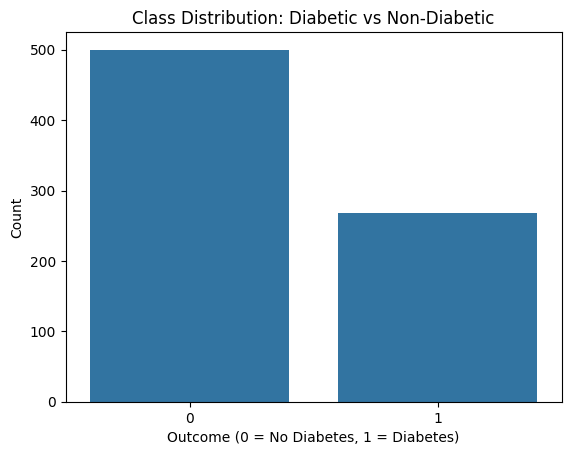

In [ ]:
# Plot class distribution
sns.countplot(data=df, x='Outcome')
plt.title('Class Distribution: Diabetic vs Non-Diabetic')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()


The bar chart shows the class distribution in the dataset for the target variable Outcome, which represents whether a person has diabetes. There are two classes: 0 for non-diabetic and 1 for diabetic. From the chart, we can see that around 500 people in the dataset do not have diabetes, while approximately 270 do. This reveals a class imbalance, with non-diabetic cases making up about 65 percent of the data. Class imbalance can impact the performance of some machine learning models, especially in detecting the minority class. Handling this properly is important for accurate predictions in healthcare.To address this issue, the study uses stratified sampling during the train-test split to maintain the original class proportions. Additionally, it considers using evaluation metrics like F1-score and ROC-AUC instead of accuracy alone, as they provide better insight into model performance when dealing with imbalanced datasets common in medical predictions (Lu et al., 2022).

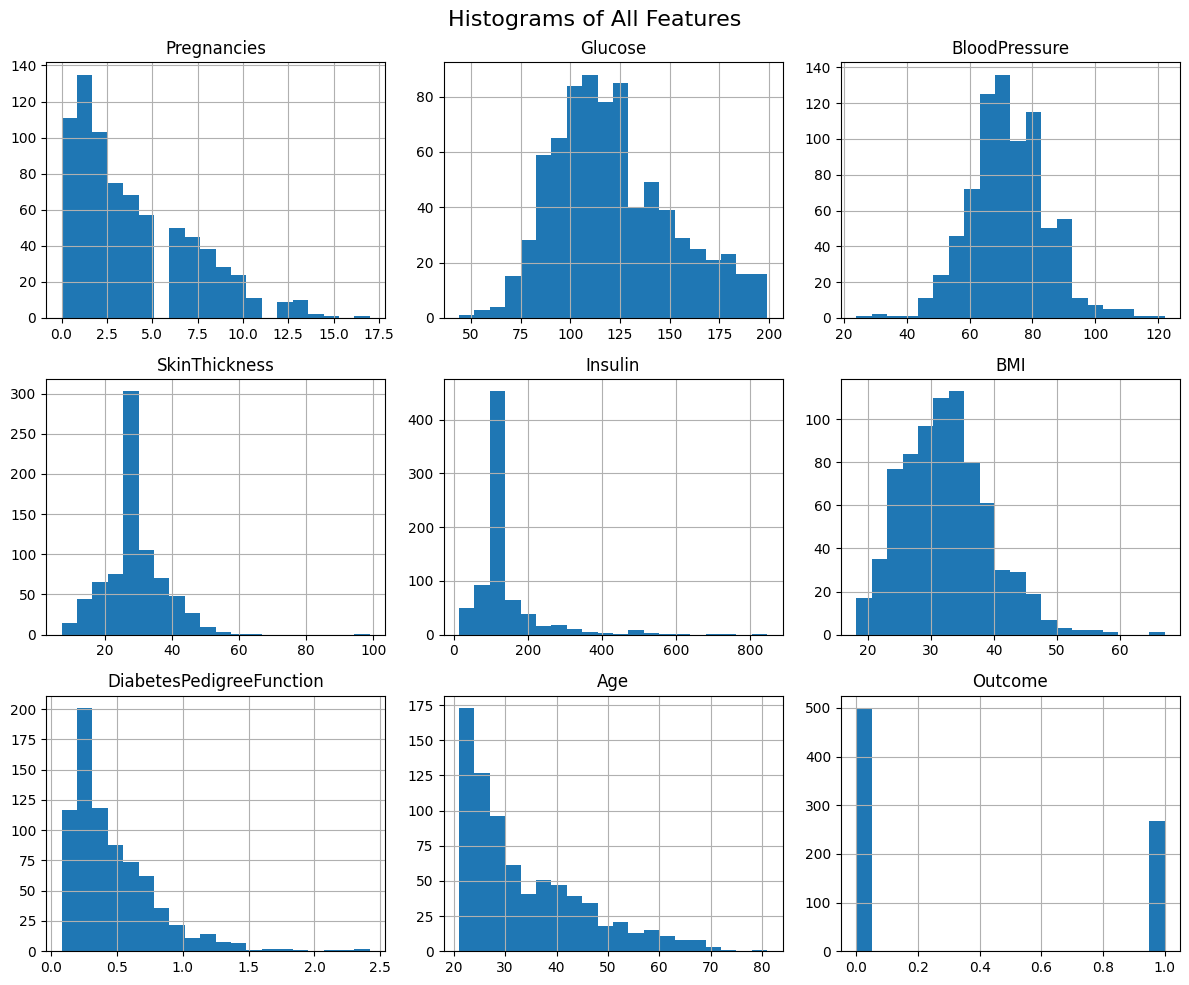

In [ ]:

# Histograms for each feature
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of All Features", fontsize=16)
plt.tight_layout()
plt.show()


The graph display histograms for each feature in the dataset, help understand their distributions. Most features show skewed or non-normal distributions. For example, Pregnancies and Age are right-skewed, with most patients having fewer pregnancies and being relatively younger. Glucose and BMI have roughly bell-shaped curves but with noticeable tails, showing some extreme values. Insulin and SkinThickness are heavily skewed, which is expected since many values were missing and later imputed. Blood Pressure shows a fairly centered distribution but still has some outliers. The Diabetes Pedigree Function is highly right-skewed, meaning most patients have a low genetic risk but a few have very high scores. The Outcome histogram again ensures the class imbalance. These patterns are useful in feature selection and model tuning. For example, skewed distributions may require transformation or scaling, while extreme outliers could affect model performance. Visual analysis like this guides better preprocessing and modeling decisions.To improve model performance, the study considers applying log or square root transformations to features with strong skewness, particularly Insulin and Diabetes Pedigree Function. Recognizing these distribution patterns also helps in selecting appropriate algorithms, as some models are more robust to non-normal data. This step enhances both accuracy and reliability.

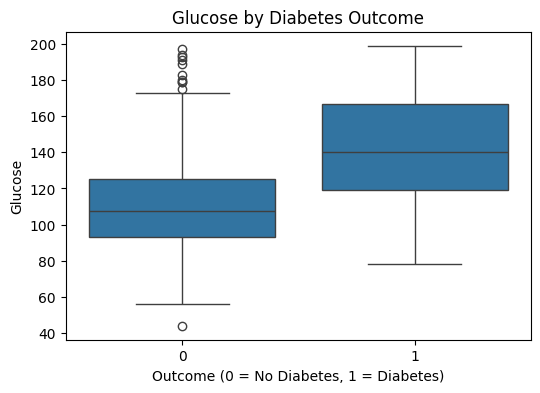

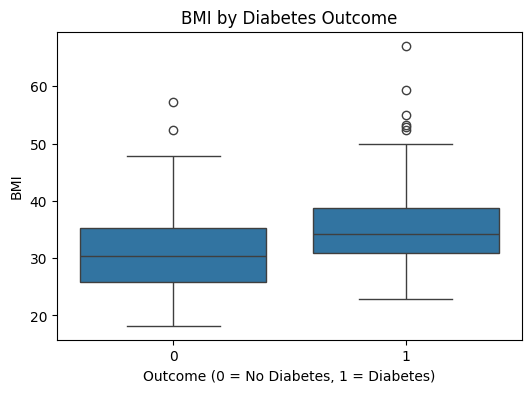

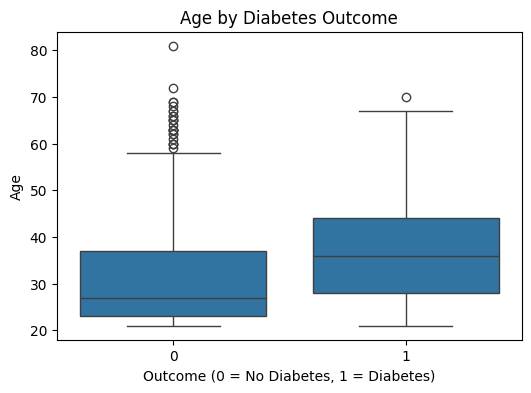

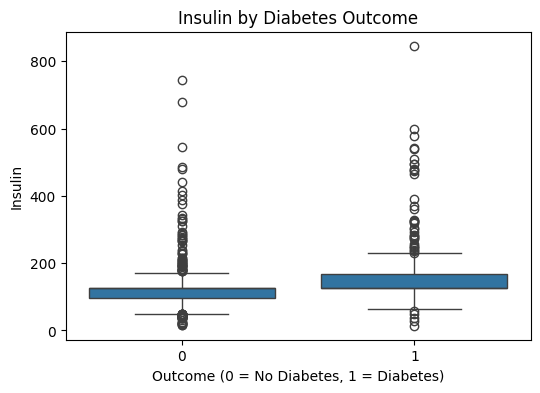

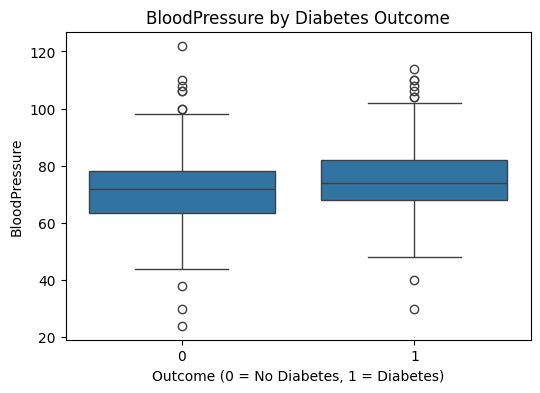

In [ ]:


# Boxplots of key features grouped by Outcome
features_to_plot = ['Glucose', 'BMI', 'Age', 'Insulin', 'BloodPressure']
for col in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Outcome', y=col)
    plt.title(f'{col} by Diabetes Outcome')
    plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
    plt.ylabel(col)
    plt.show()


These boxplots compare the distributions of key health indicators between diabetic and non-diabetic individuals.

Glucose levels are noticeably higher in diabetic patients, showing a clear separation between the two groups. This makes glucose a strong predictor of diabetes. Similarly, BMI is generally higher for diabetic individuals, suggesting that body weight and obesity are important risk factors. In terms of age, diabetic patients tend to be older on average, although there is some overlap. Blood pressure also appears slightly higher in diabetic patients, but the difference is less pronounced compared to glucose and BMI. These graphs patterns help understand which features may be most useful in predicting diabetes. Glucose, BMI, and age stand out as more informative, while blood pressure shows a smaller impact. The plots also highlight the presence of outliers, especially in glucose and age, which need to be considered during model training and evaluation.

These insights support the selection of features for model development, prioritizing those with stronger visual separation between classes. The study also considers applying outlier handling techniques such as capping or robust scaling to reduce their influence on model performance. By identifying variables that contribute most to distinguishing diabetic from non-diabetic individuals, the study ensures that the final model is not only accurate but also interpretable. This level of understanding allows healthcare professionals to focus on the most relevant clinical indicators during early screening and intervention efforts.

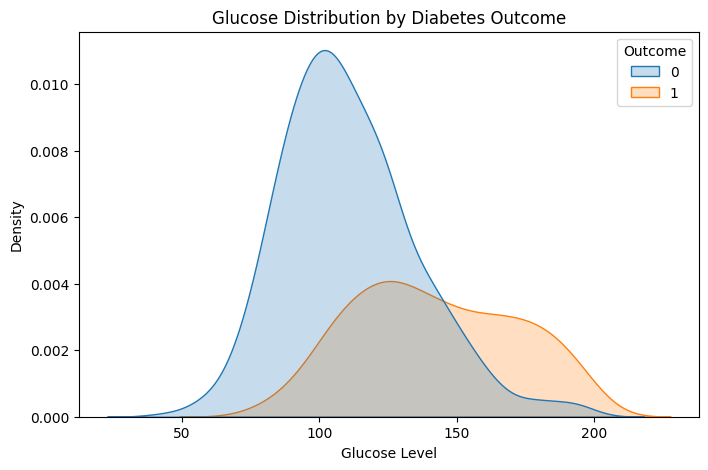

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x="Glucose", hue="Outcome", fill=True)
plt.title("Glucose Distribution by Diabetes Outcome")
plt.xlabel("Glucose Level")
plt.ylabel("Density")
plt.show()


This KDE plot compares glucose levels for diabetic and non-diabetic individuals. Diabetic patients (orange) tend to have noticeably higher glucose levels, with their distribution shifted to the right. Non-diabetics (blue) mostly cluster around lower glucose values. This strong separation shows that glucose is a key feature for predicting diabetes. The overlap is small, which suggests high glucose levels are more common among diabetic cases.
 This clear separation highlights glucose as one of the most influential features in the dataset. It suggests that even simple threshold-based models could partially detect diabetes using glucose alone. However, for more reliable predictions, glucose should be combined with other features like BMI and age. The narrow overlap between the classes also indicates that the model can achieve high precision when predicting diabetic cases based on elevated glucose levels. This insight reinforces the clinical importance of monitoring glucose in diabetes risk assessments.

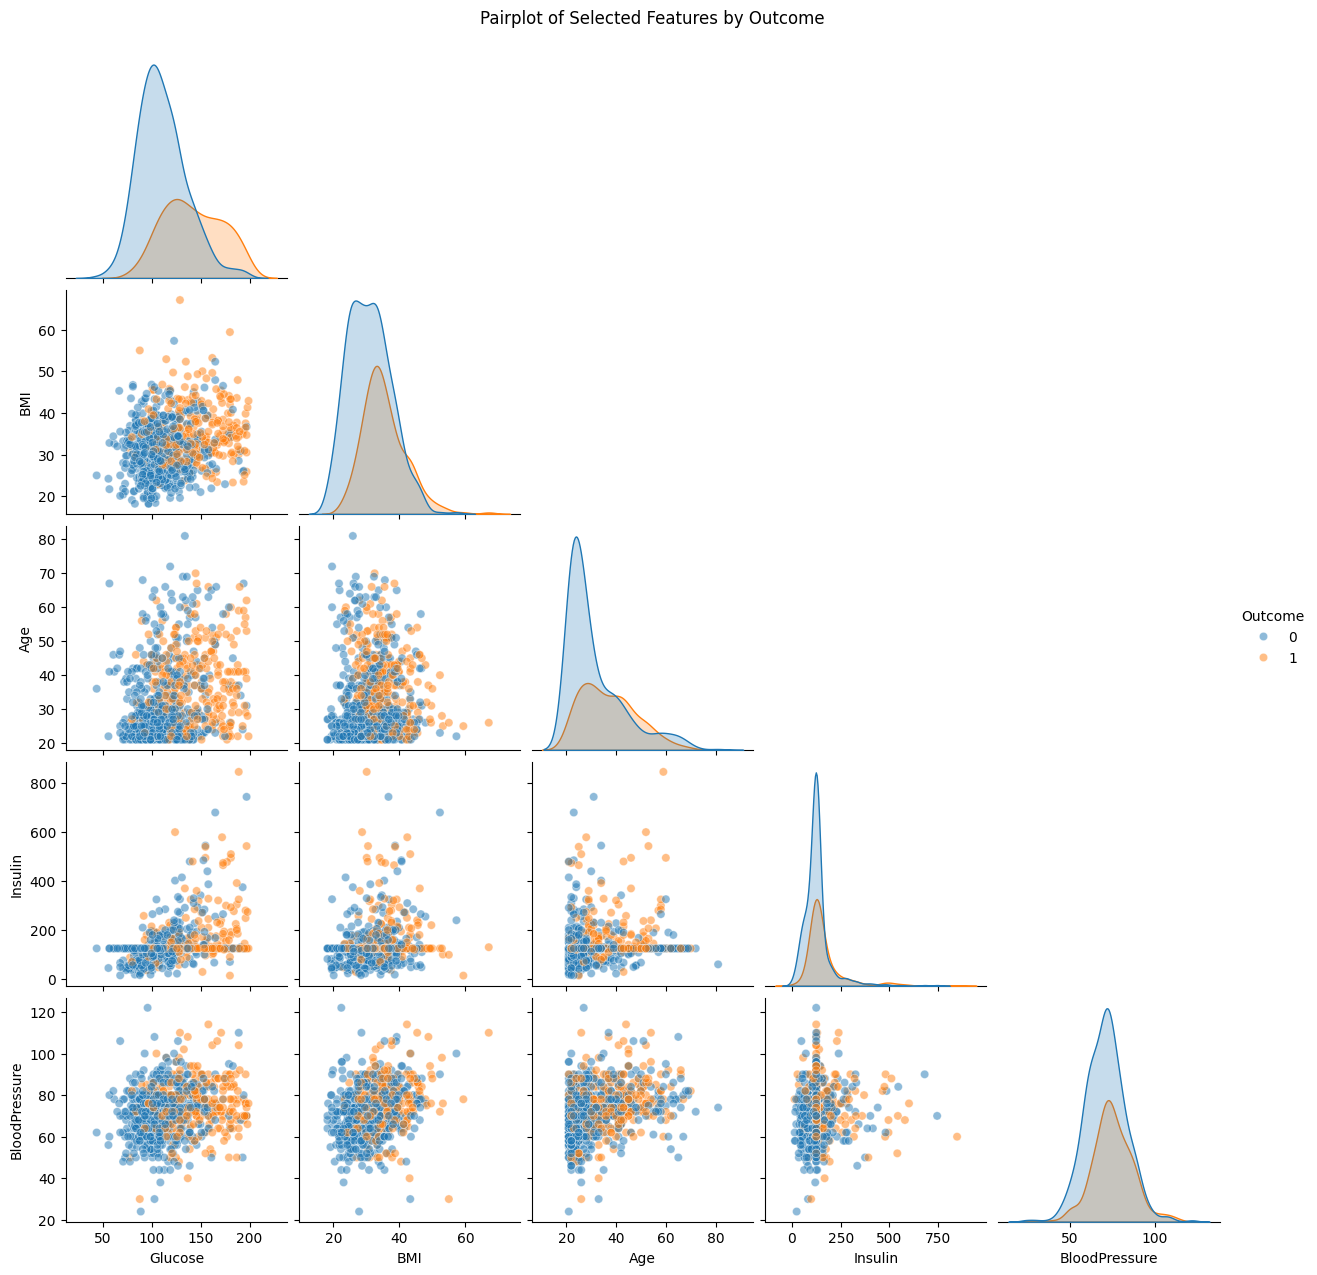

In [ ]:
selected_features = ['Glucose', 'BMI', 'Age', 'Insulin', 'BloodPressure', 'Outcome']
sns.pairplot(df[selected_features], hue="Outcome", corner=True, plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Selected Features by Outcome", y=1.02)
plt.show()


The pairplot shows relationships between selected features (Glucose, BMI, Age, Insulin, Blood Pressure) colored by diabetes outcome. Diabetic cases (orange) tend to appear in higher ranges of glucose, age, and BMI. There are some visible trends like glucose increasing with insulin or BMI increasing with age. Distributions along the diagonals confirm skewed patterns in glucose and insulin. This chart helps identify which features have stronger separation between diabetic and non-diabetic cases. It also reveals clusters and correlations that are useful for selecting and engineering features for machine learning models.

The pairplot also helps detect potential multicollinearity between features, which can influence the choice of modeling techniques (Yıldırım, 2024). For example, the positive relationship between glucose and insulin suggests that one may partially predict the other, which could be considered during feature selection. The clustering of diabetic cases in specific regions of the plots shows that non-linear relationships may exist, supporting the use of more flexible models like Random Forest or SVM. Overall, this visual tool enhances understanding of feature interactions and supports the design of more accurate and interpretable models.

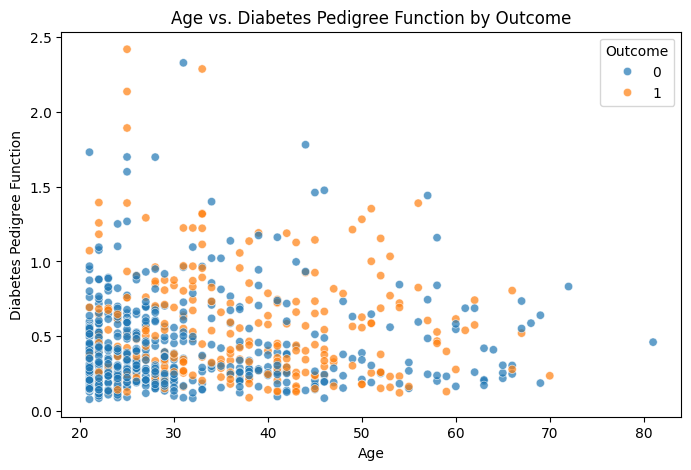

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Age", y="DiabetesPedigreeFunction", hue="Outcome", alpha=0.7)
plt.title("Age vs. Diabetes Pedigree Function by Outcome")
plt.xlabel("Age")
plt.ylabel("Diabetes Pedigree Function")
plt.show()


This scatter plot displays the relationship between age and diabetes pedigree function, with each point colored by diabetes outcome. Diabetic cases (orange) appear more frequently at older ages and with higher pedigree scores, though there is substantial overlap with non-diabetics. Most data points are clustered around lower pedigree values. While age shows some spread, the pedigree function seems more randomly distributed. This plot suggests that age contributes more significantly to outcome prediction than pedigree alone. However, combining both features may still help enhance model performance when used together.

The scatter plot also highlights the potential for interaction effects between age and pedigree function, where their combined influence may offer predictive value beyond their individual contributions. Though the pedigree function alone appears weak, it could act as a secondary indicator when paired with stronger features like age or glucose. Additionally, the clustering at lower pedigree values suggests the need for techniques like feature scaling or transformation to ensure fair contribution in modeling. Understanding such interactions supports building more nuanced models for diabetes prediction.

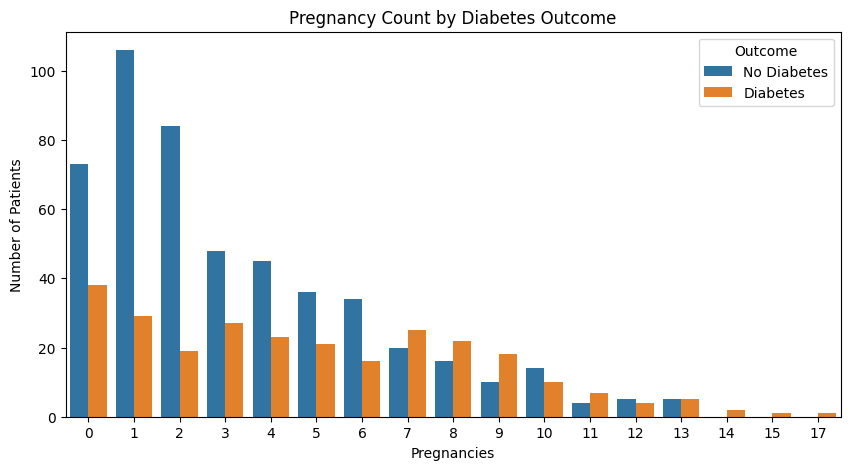

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Pregnancies', hue='Outcome')
plt.title("Pregnancy Count by Diabetes Outcome")
plt.xlabel("Pregnancies")
plt.ylabel("Number of Patients")
plt.legend(title="Outcome", labels=["No Diabetes", "Diabetes"])
plt.show()


This bar chart compares pregnancy counts across diabetic and non-diabetic groups. Non-diabetics are more common among those with fewer pregnancies, especially in the 0 to 3 range. In contrast, diabetic patients become more prominent as the number of pregnancies increases. This pattern shows a potential link between higher pregnancy count and increased diabetes risk. Although not perfectly linear, the trend indicates that pregnancy history may be a useful feature in modeling. The plot also helps visualize how class distribution shifts across different levels of a categorical feature like pregnancies.

Moroever. this trend aligns with existing medical research suggesting that hormonal and metabolic changes during multiple pregnancies may contribute to long-term glucose regulation issues. While the pattern is not strictly linear, the general rise in diabetic cases with higher pregnancy counts indicates a meaningful relationship worth capturing in predictive models. The study may also consider binning the pregnancy variable into grouped ranges to reduce noise and improve model stability. Including pregnancy count as a feature helps personalize risk predictions, especially for female patients, by incorporating relevant reproductive health history into the analysis.

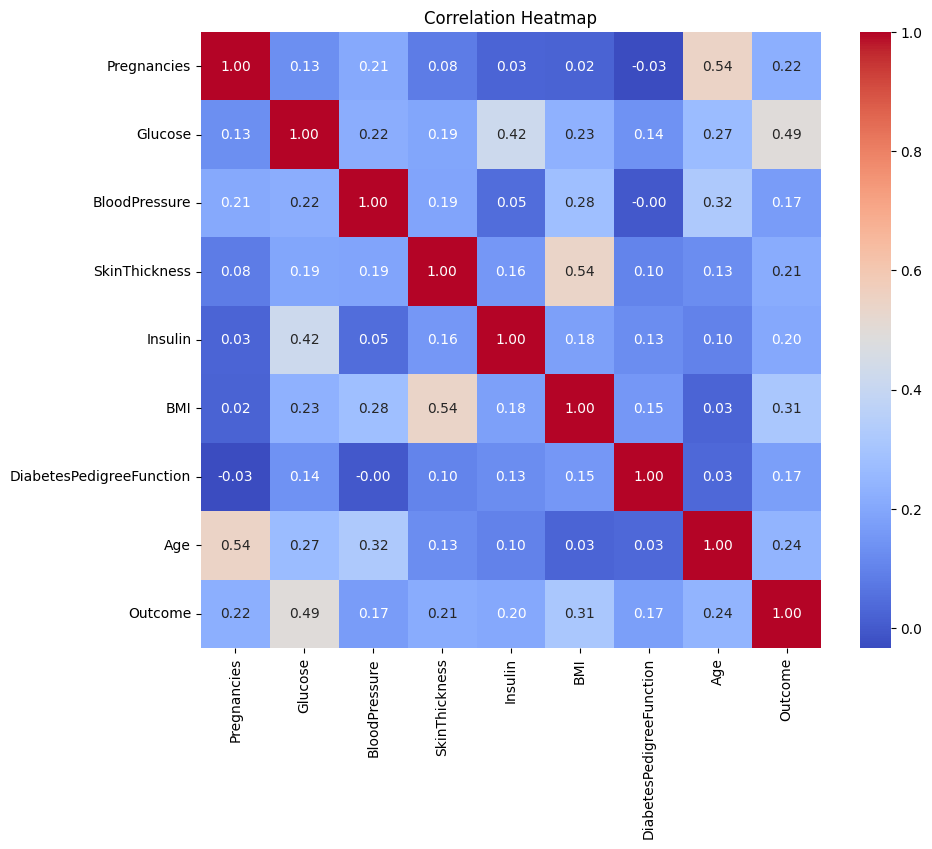

In [ ]:

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

The heatmap shows the correlation between all numeric features. The Outcome column has the highest correlation with Glucose (0.49), followed by BMI (0.31) and Age (0.24). This ensures that these are the most predictive variables for diabetes. There is also some moderate correlation between BMI and SkinThickness (0.54), and Age and Pregnancies (0.54). Most other feature pairs show weak or no correlation. This heatmap helps in identifying redundant or highly related features and guides feature selection. It also confirms the earlier visual insights from boxplots and pairplots.

The low correlation between most features indicates that multicollinearity is not a major concern, allowing models to consider each variable's unique contribution (Drobnič et al., 2020). However, the moderate relationships like between BMI and SkinThickness, suggest some shared information that could be addressed with dimensionality reduction if needed. The strong link between glucose and outcome further reinforces its importance in model training. This correlation analysis not only supports data-driven feature selection but also aids in simplifying models without significant performance loss, especially when aiming for interpretability in clinical decision-making tools.

In [ ]:
# Step 1: Define features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Step 2: Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Step 3: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train set shape: (614, 8)
Test set shape: (154, 8)


The study initially divides the data into input (X) and target (y) that is the outcome of diabetes. We then divide the data into training and test sets in the ratio of 80 to 20, but we use stratification so that the training and testing sets have the same class distribution. This prevents model evaluation bias. The training set will have 614 samples and the test set will have 154. In addition, feature scaling on StandardScaler is used to normalize the data in the study. This will facilitate all features playing an equal role in model performance.


The feature scaling particularly matters to the algorithm type such as Support Vector Machines or Logistic Regression which are sensitive to the size of input values. Lack of scaling could cause the most numerically large features to overpower the learning procedure and decrease the overall model performance (e.g. glucose or insulin). The procedure of converting the data to the same scale enhances the speed of convergence as well as equitable distribution of weights over all features in the study. By performing this initial preprocessing phase, a robust base of training a correct and steady machine learning model is established, and the data becomes applicable to a broad spectrum of classification algorithms involved in healthcare prediction tasks.

 Logistic Regression Evaluation:

Accuracy: 0.7077922077922078

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



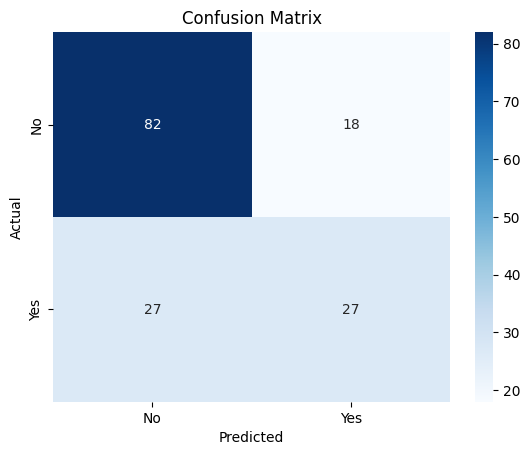

ROC-AUC Score: 0.812962962962963


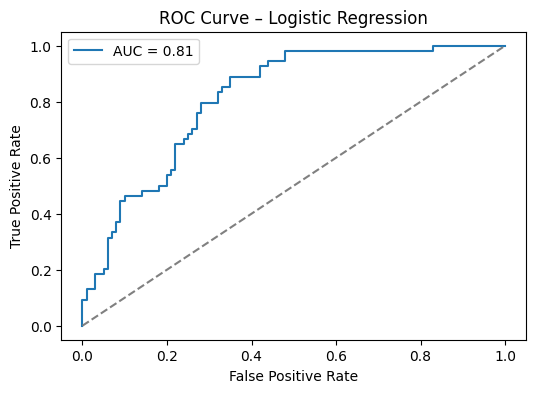

In [ ]:
# Train logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print(" Logistic Regression Evaluation:\n")

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.show()


The test accuracy using the Logistic Regression model is approximately 71%. As illustrated by the confusion Matrix, the model was able to correctly identify 82 non-diabetic and 27 diabetic cases while misclassifying 18 non-diabetic and 27 diabetic cases. Based on the classification report, the model classifies better non-diabetic cases with high precision and recall. The ROC curve has a good appearance, having AUC of 0.81, which means that it discriminates between the two classes. Although the model may not be ideal, particularly in the detection of diabetic cases, it nevertheless offers a good point of reference when compared to other models.


Logistic Regression has the benefit of being straightforward, quick and very interpretable which makes it easy to use as a primary diagnostic device in the clinical environment (Hua et al., 2025). Its relative underperformance on the diabetic class, especially low recall, however, indicates it might be missing a large number of positive cases. This may prove dangerous in practical health care situations where timely diagnosis is paramount. The model can still be regarded as a benchmark, regardless of its downsides, to determine the advancement provided by more complex algorithms. Additional improvements might involve feature engineering, resampling, or ensemble models as a way of improving the detection of high-risk individuals.

 Random Forest Evaluation:

Accuracy: 0.7792207792207793

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.61      0.66        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



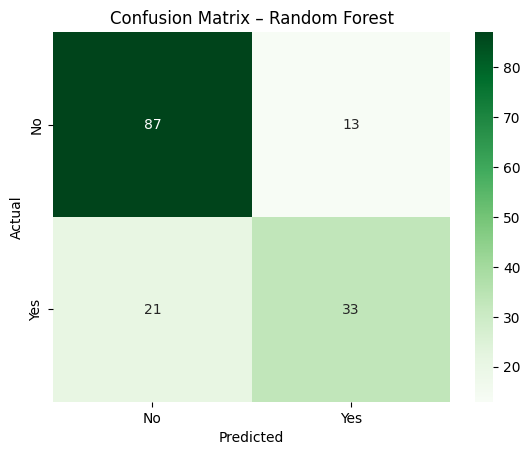

ROC-AUC Score: 0.8178703703703704


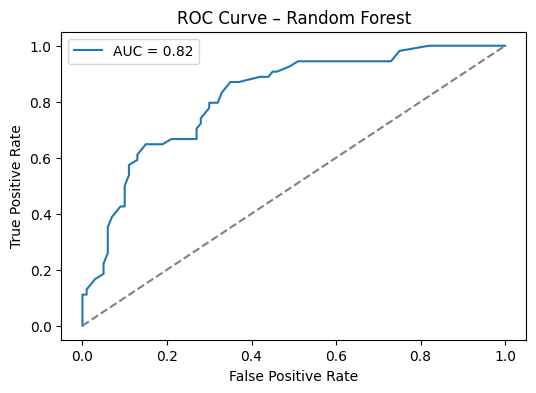

In [ ]:
# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print(" Random Forest Evaluation:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Random Forest")
plt.show()

# ROC-AUC
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print("ROC-AUC Score:", roc_auc_rf)

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f"AUC = {roc_auc_rf:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest")
plt.legend()
plt.show()


The Random Forest model is more accurate when compared with logistic regression, having an accuracy of approximately 78 percent. As indicated in the confusion matrix, it has made 87 correct predictions on non-diabetic and 33 on diabetic cases. There were fewer misclassifications than there was in the prior model. There was also an increase in the precision and recall values, particularly that of the diabetic class. The score of 0.82 in the AUC test makes sure that the model is doing a fine job in classifying between the classes. The Random Forest works better, especially with the right prediction of diabetic patients, thus it is more valuable in this classification task.


Random Forest is also unique in that it offers feature importances built in, making it easier to understand which variables have the largest effects on predictions (Salman et al., 2024). Its non-linear capacity and resistance to overfitting makes it highly applicable in medical data with non-linear patterns. The better recall of diabetic cases is particularly important in healthcare, where false negatives can postpone vital treatment. Furthermore, random forest is able to handle the missing values as well as outliers as compared to the simple models. These benefits not only make it a more precise model but also a clinical decision support and robust tool with respect to prediction and diagnosis of diabetes in the real world.

SVM Evaluation:

Accuracy: 0.7402597402597403

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154



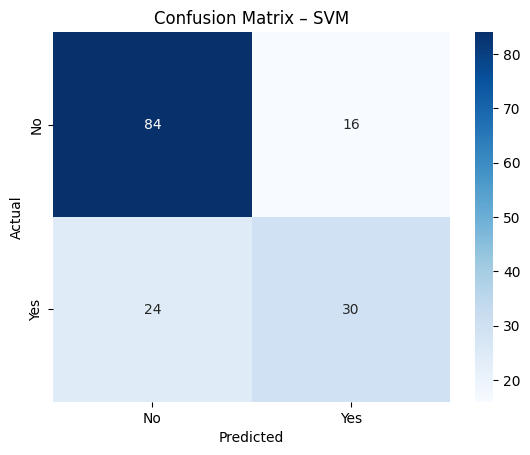

ROC-AUC Score: 0.7963888888888889


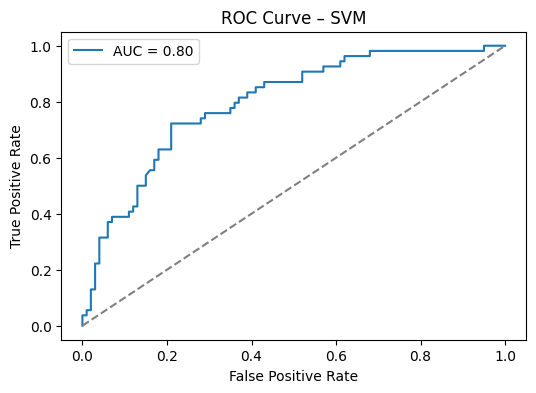

In [ ]:
# Train SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test_scaled)
y_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("SVM Evaluation:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – SVM")
plt.show()

# ROC-AUC
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)
print("ROC-AUC Score:", roc_auc_svm)

# ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
plt.figure(figsize=(6, 4))
plt.plot(fpr_svm, tpr_svm, label=f"AUC = {roc_auc_svm:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – SVM")
plt.legend()
plt.show()


The Support Vector Machine (SVM) model has an accuracy of around 74 percent. The confusion matrix indicates that it accurately identified 84 non-diabetic and 30 diabetic cases, whilst failing to identify 16 non-diabetic and 24 diabetic cases. The classification report shows equal accuracy and recall with a slightly higher score in the non-diabetic category. The ROC curve AUC score of 0.80 indicates that the model is able to discriminate well between the two classes. The SVM is quite good and has a good balance between accuracy and class-wise prediction although lower than the Random Forest model.

The SVM model advantages consist of its capability to work with high data dimensions and identify the best decision boundaries, which makes it practical in multi-dimensional classification tasks. This is because it performs well in both classes implying that it can generalize well, particularly with adequate scaling. SVMs however are sensitive to parameter tuning and they might need more computational resources than the Logistic Regression. Nevertheless, even in areas where a trade-off between precision and recall cannot be tolerated, the model remains useful. As optimized further, like through the choice of kernels or the optimization of hyperparameters, SVM may even be able to achieve the performance of ensemble models.

# Recommendation
According to the model performances, theRandom Forest classifier can be suggested to predict diabetes outcomes in the current dataset. It provided the best accuracy and balanced performance of the two classes especially in proper identification of diabetic patients, which is important in early intervention. Hyperparameter optimization and methods such as cross-validation can be used to further enhance prediction (Sampath et al., 2024). Moreover, there is the potential to improve recall of the diabetic cases by using the oversampling approaches such as SMOTE to reduce the issue of class imbalance. To be deployed, it is necessary to continuously re-train the model with new data and evaluate its performance to guarantee its accuracy and fairness in clinical practice.


The feature importance information is also available in the Random Forest model and can inform healthcare professionals on implications of the most influential medical indicators including glucose, BMI, and age. Such interpretability will enhance acceptability and use of machine learning tools in clinical settings. Additionally, the model is resistant to outliers and missing data, which makes it a good choice when dealing with imperfect real-world data. To be applicable over the long term, the model may be implemented in electronic health systems and allow predicting and proactive care in real time. Ethical and effective model deployment would be of great importance in ensuring data privacy, fairness and continual examination.

# Conclusion
This study aims to predict the probability of diabetes based on patient health data. We tested three classification models, Logistic Regression, random forest, and SVM, after cleaning, exploring, and modeling the dataset. Random Forest was the most successful model among them, able to achieve high accuracy and strong recall both in diabetic and non-diabetic classes. The EDA findings also helped to validate that glucose, BMI and age are major determinants of diabetes. The results prove the effectiveness of machine learning in the healthcare sector in predicting diseases early on to support timely medical decisions and improve patient outcomes.


The study emphasizes the role of good preprocessing of the data such as filling in of missing values, scaling as well as dealing with class imbalance to develop robust predictive models. Boxplots, KDEs and correlation heatmaps proved to be useful in terms of gathering insights into how features behave and relate to each other. Although the performance of Random Forest was the best in this scenario, further improvement can be achieved by continuously optimizing the model by changing hyperparameters and external validation with new data sets. All in all, the project demonstrates that machine learning can be used to aid preventative approaches to healthcare and help medical practitioners identify people at risk long before they develop serious symptoms.



# References

* Hossain, M.J., Al‐Mamun, M. and Islam, M.R., 2024. Diabetes mellitus, the fastest growing global public health concern: Early detection should be focused. Health Science Reports, 7(3), p.e2004.
* Rahman, M.H., Uddinb, M.K.S., Hossanc, K.M.R. and Hossaind, M.D., 2024. The role of predictive analytics in early disease detection: a data-driven approach to preventive healthcare. Journal of the Learning Sciences, 32(2), p.2024.
* Sampath, P., Elangovan, G., Ravichandran, K., Shanmuganathan, V., Pasupathi, S., Chakrabarti, T., Chakrabarti, P. and Margala, M., 2024. Robust diabetic prediction using ensemble machine learning models with synthetic minority over-sampling technique. Scientific Reports, 14(1), p.28984.
* Ozsahin, D.U., Mustapha, M.T., Mubarak, A.S., Ameen, Z.S. and Uzun, B., 2022, August. Impact of feature scaling on machine learning models for the diagnosis of diabetes. In 2022 International Conference on Artificial Intelligence in Everything (AIE) (pp. 87-94). IEEE.
* Zhao, J., Gao, H., Yang, C., An, T., Kuang, Z. and Shi, L., 2024. Attention-oriented cnn method for type 2 diabetes prediction. Applied Sciences, 14(10), p.3989.
* Lu, H., Ehwerhemuepha, L. and Rakovski, C., 2022. A comparative study on deep learning models for text classification of unstructured medical notes with various levels of class imbalance. BMC medical research methodology, 22(1), p.181.
* Yıldırım, H., 2024. The multicollinearity effect on the performance of machine learning algorithms: Case examples in healthcare modelling. Academic Platform Journal of Engineering and Smart Systems, 12(3), pp.68-80.
* Drobnič, F., Kos, A. and Pustišek, M., 2020. On the interpretability of machine learning models and experimental feature selection in case of multicollinear data. Electronics, 9(5), p.761.
* Hua, Y., Stead, T.S., George, A. and Ganti, L., 2025. Clinical risk prediction with logistic regression: Best practices, validation techniques, and applications in medical research. Academic Medicine & Surgery.
* Salman, H. A., Kalakech, A., & Steiti, A. (2024). Random forest algorithm overview. Babylonian Journal of Machine Learning, 2024, 69-79.
